Characterization of 105 nm nanospheres from the Sloan-Kettering center

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from analysis_utils import *

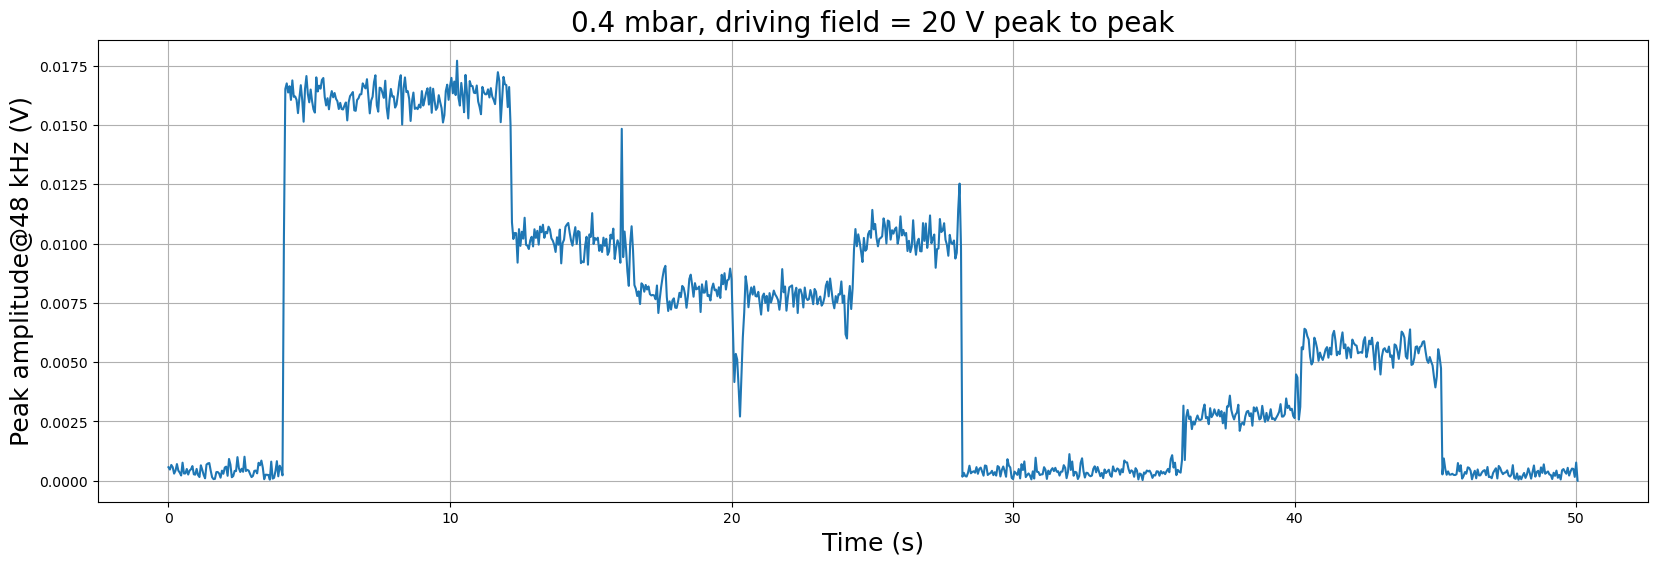

In [2]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere\charging_50s_48khz_10.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

fig, ax = plot_peak_amp(data, 48000, title='0.4 mbar, driving field = 20 V peak to peak')

There are two charges on the sphere.

In [30]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere\noefield_20s_10.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

ff, pp = get_psd(data)
ffx, ppx = get_psd(data, channel=2)

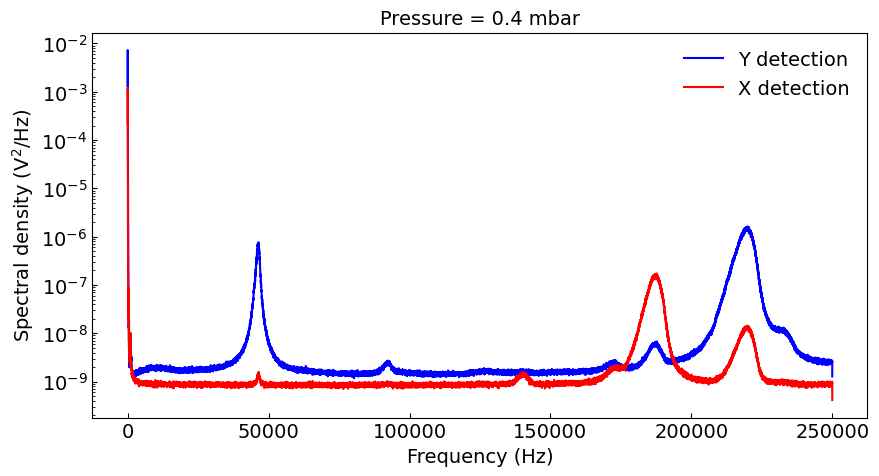

In [21]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ff, pp, 'b', label='Y detection')
ax.plot(ffx, ppx, 'r', label='X detection')

ax.set_title('Pressure = 0.4 mbar', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Spectral density (V$^2$/Hz)', fontsize=14)

ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)


Amplitude: 378664707.63716084, central frequency: 46292.345328246585 Hz, gamma: 981.7890815059087 Hz


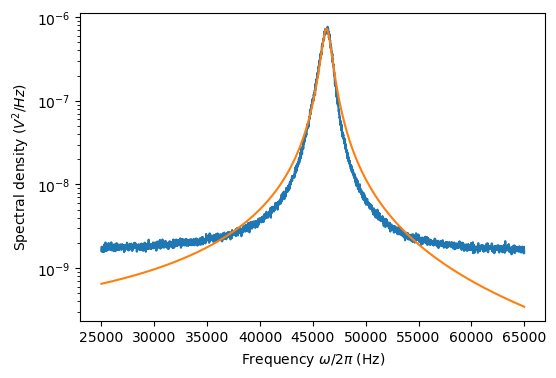

In [23]:
lb, ub = 2500, 6500
p0 = [3e8, 39000*2*np.pi, 4000]

fig, ax, popt = plot_and_fit_peak(ff, pp, lb, ub, p0)
amp, omega0, gamma = popt

In [31]:
T   = 300  # K
kb  = 1.38e-23

# Use this value after ethanol is gone
# rho = 1800 # kg/m^3

## Use this value if there is ethanol
rho = 2200 # kg/m^3
r   = 105e-9 / 2
m   = rho * (4 * np.pi / 3) * r**3 

# Again need to take care of 2 pi normalization
# because the formula assume integrating over `omega`, not `f`
v2 = 0.5 * np.pi/(gamma * omega0**2) * amp * gamma / (2 * np.pi)

# If numerical integration is preferred
# v2 = np.trapz(pp[lb:ub], ff[lb:ub] * 2 * np.pi) / (2 * np.pi)

# Calibration factor converting <V^2> to (x^2)
c_cal_square = (v2 * m * omega0**2) / (kb * T)
print(fr'Calibration factor square $c^2$: {c_cal_square}')

Calibration factor square $c^2$: 30491844598.43519


In [32]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere\nohv_20s_48khz_10.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

ff, pp = get_psd(data)

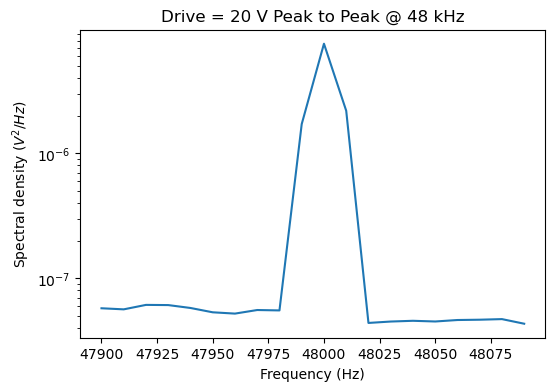

In [36]:
lb, ub = 4790, 4810
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ff[lb:ub], pp[lb:ub])

ax.set_title('Drive = 20 V Peak to Peak @ 48 kHz')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Spectral density ($V^2 / Hz$)')

ax.set_yscale('log')

In [34]:
all_idx = np.arange(lb, ub, 1)
excluding_peak = np.logical_or(all_idx < 4796, all_idx > 4804)

area_all = np.trapz(pp[all_idx], ff[all_idx]*2*np.pi)
area_excluding_peak = np.trapz( pp[all_idx[excluding_peak]], ff[all_idx[excluding_peak]]*2*np.pi )

# Excluding background contribution (which is very small)
# Take care of 2 pi normalization after numerical integration
# because we integrated over omega here
v2_drive = (area_all - area_excluding_peak) / (2 * np.pi)

In [35]:
omega_drive = 48000 * 2 * np.pi

x2_drive = v2_drive / c_cal_square
f_amp_squared = x2_drive * 2 * m**2 * ( (omega0**2 - omega_drive**2)**2 + gamma**2 * omega_drive**2)

charge = np.sqrt(f_amp_squared) / (1.6e-19 * 250 * 10)
print(f'Charge on the sphere derived through a driving E field: +/- {charge:.2f} e')

Charge on the sphere derived through a driving E field: +/- 1.90 e


In [37]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere\freq_comb_20_70_2khz_10vp2p_hp_10.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

ff, pp = get_psd(data)

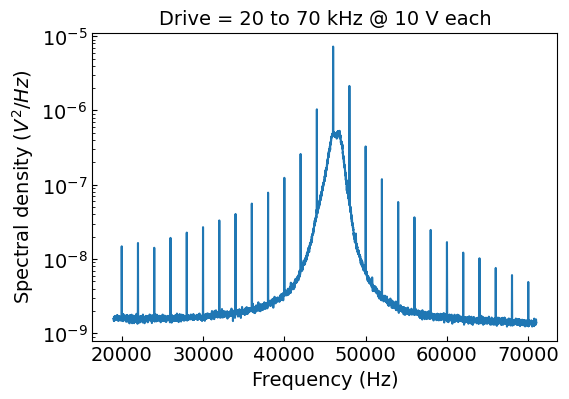

In [45]:
lb, ub = 1900, 7100
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(ff[lb:ub], pp[lb:ub])

ax.set_title('Drive = 20 to 70 kHz @ 10 V each', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Spectral density ($V^2 / Hz$)', fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)

ax.set_yscale('log')

In [39]:
charge = 2 * 1.6e-19  # Coulombs

efield = 250          # V/m when 1 V is applied
drive_amp = 10  # peak-to-peak voltage for each freq component in V
freq_comb_file = r"C:\Users\microspheres\Documents\Python Scripts\Experiment Control\freq_comb_20khz_70khz_deltaf2khz.npz"

ff_drive, chisquare = get_chisquare(ff, pp, drive_amp, freq_comb_file, charge, efield, c_cal_square)

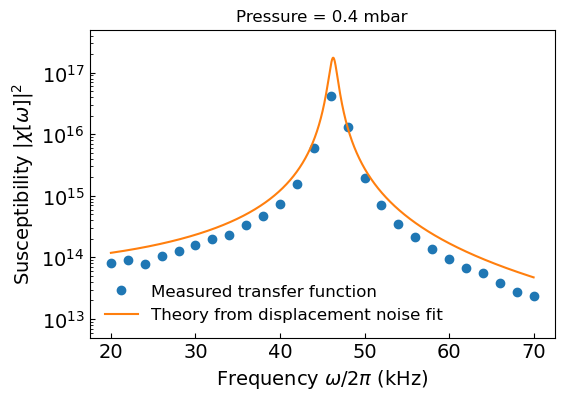

In [43]:
lb, ub = 2000, 7000

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(ff_drive/1000, chisquare, 'o', label='Measured transfer function')
ax.plot(ff[lb:ub]/1000, peak_func(ff[lb:ub]*2*np.pi, 1/(m * m * gamma), omega0, gamma), label='Theory from displacement noise fit')

ax.set_title('Pressure = 0.4 mbar')
ax.set_xlabel(r'Frequency $\omega / 2 \pi$ (kHz)', fontsize=14)
ax.set_ylabel(r'Susceptibility $| \chi[\omega] |^2$', fontsize=14)

ax.set_ylim(5e12, 5e17)
ax.legend(loc='lower left', frameon=False, fontsize=12)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)
ax.set_yscale('log')

## Particle at low pressure

In [2]:
data_file = r"C:\Users\microspheres\Desktop\100nmsphere\noefield_1s_4e-6mbar.csv"
data = np.genfromtxt(data_file, delimiter=',', skip_header=3).T

In [3]:
# Time recorded in ms
ff, pp = get_psd(data, 1, time_unit_prefix=1e-3)
ffx, ppx = get_psd(data, 2, time_unit_prefix=1e-3)
ff_fb, pp_fb = get_psd(data, 4, time_unit_prefix=1e-3)

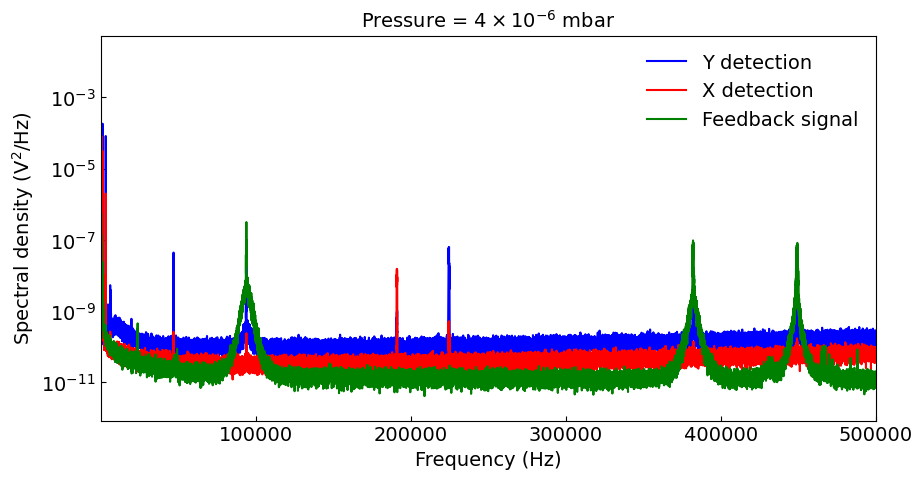

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(ff, pp, 'b', label='Y detection')
ax.plot(ffx, ppx, 'r', label='X detection')
ax.plot(ff_fb, pp_fb, 'g', label='Feedback signal')

ax.set_xlim(10, 500000)
ax.set_title(r'Pressure = $4 \times 10^{-6}$ mbar', fontsize=14)
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Spectral density (V$^2$/Hz)', fontsize=14)

ax.set_yscale('log')
ax.legend(frameon=False, fontsize=14)
ax.tick_params(axis='both', which='both', direction='in', labelsize=14)